In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Data Wrangling

In [31]:
df = pd.read_csv("./2025/AUG/GFDLCM_STOCK_01082025.csv").set_index("Time")
df.head()

,Ticker,Date,Open,High,Low,Close,Volume,Open Interest
Time,,,,,,,,
09:15:59,RELIANCE.NSE,01/08/2025,1386.9,1390.2,1384.3,1387.9,253531,0
09:16:59,RELIANCE.NSE,01/08/2025,1387.4,1390.1,1387.4,1388.4,43903,0
09:17:59,RELIANCE.NSE,01/08/2025,1388.4,1390.2,1386.6,1389.0,48738,0
09:18:59,RELIANCE.NSE,01/08/2025,1388.7,1390.0,1387.3,1388.9,66726,0
09:19:59,RELIANCE.NSE,01/08/2025,1389.4,1392.0,1389.2,1390.8,30723,0


In [32]:
drop_columns = ["Ticker", "Date", "Volume", "Open Interest"]
df = df.drop(columns=drop_columns)

In [33]:
print(df.head())

            Open    High     Low   Close
Time                                    
09:15:59  1386.9  1390.2  1384.3  1387.9
09:16:59  1387.4  1390.1  1387.4  1388.4
09:17:59  1388.4  1390.2  1386.6  1389.0
09:18:59  1388.7  1390.0  1387.3  1388.9
09:19:59  1389.4  1392.0  1389.2  1390.8


    - Checking the close price

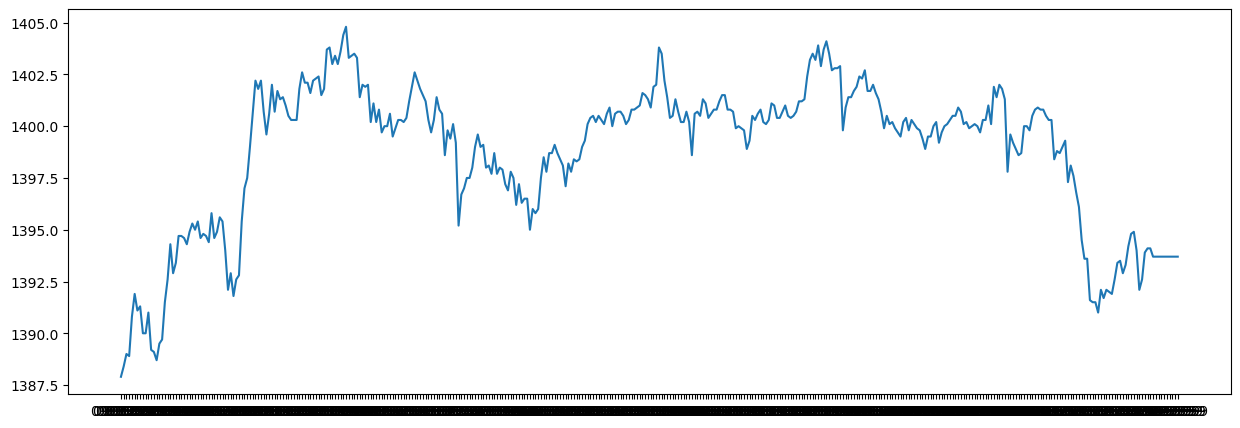

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df["Close"])

##### Creating the features

In [35]:
df["co"] = df["Close"] - df["Open"]
df["ch"] = df["Close"] - df["High"]
df["cl"] = df["Close"] - df["Low"]

In [36]:
drop_columns = ["Open", "High", "Low"]
df = df.drop(columns=drop_columns)

In [37]:
df.head()

,Close,co,ch,cl
Time,,,,
09:15:59,1387.9,1.0,-2.3,3.6
09:16:59,1388.4,1.0,-1.7,1.0
09:17:59,1389.0,0.6,-1.2,2.4
09:18:59,1388.9,0.2,-1.1,1.6
09:19:59,1390.8,1.4,-1.2,1.6


    - Visualizing the correlation(if any)

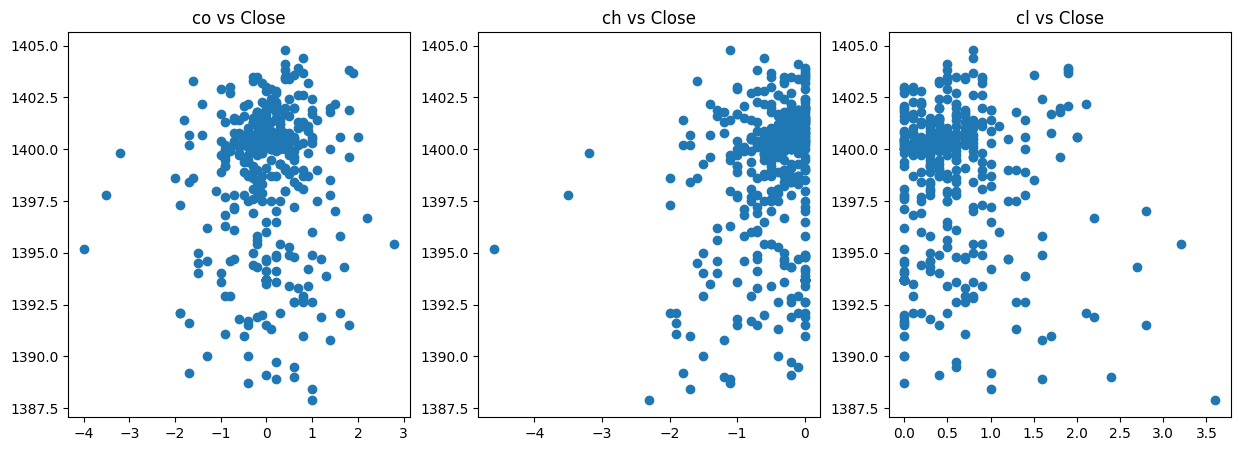

In [38]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(df["co"], df["Close"])
ax[0].set_title("co vs Close")

ax[1].scatter(df["ch"], df["Close"])
ax[1].set_title("ch vs Close")

ax[2].scatter(df["cl"], df["Close"])
ax[2].set_title("cl vs Close")

# plt.tight_layout()
plt.show()


In [39]:
df.corr()

,Close,co,ch,cl
Close,1.000000,0.055135,0.222217,-0.111354
co,0.055135,1.000000,0.712259,0.631959
ch,0.222217,0.712259,1.000000,0.195782
cl,-0.111354,0.631959,0.195782,1.000000


<Axes: >

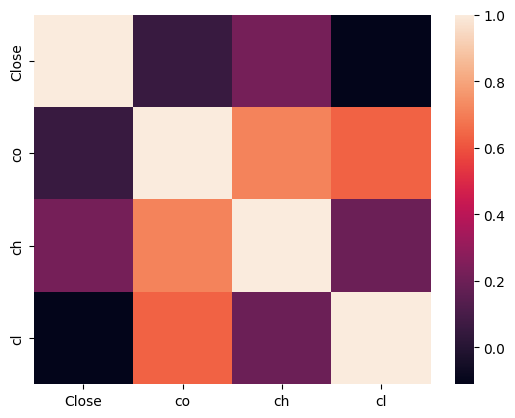

In [40]:
sns.heatmap(df.corr())

#### Creating the target

In [41]:
df["Return_15min"] = df["Close"].pct_change(periods=15) * 100
df["Return_15min"] = df["Return_15min"].shift(-15)
df = df.drop(columns=["Close"])

In [42]:
print(df.head())

           co   ch   cl  Return_15min
Time                                 
09:15:59  1.0 -2.3  3.6      0.129692
09:16:59  1.0 -1.7  1.0      0.223279
09:17:59  0.6 -1.2  2.4      0.259179
09:18:59  0.2 -1.1  1.6      0.388797
09:19:59  1.4 -1.2  1.6      0.150992


In [43]:
print(df.isna().sum()) #Check for null values

co               0
ch               0
cl               0
Return_15min    15
dtype: int64


In [44]:
df = df.dropna(how='any')   #Drop last 15 rows   
print(df.isna().sum())

co              0
ch              0
cl              0
Return_15min    0
dtype: int64


    - Understanding the data distribution of the returns

<Axes: >

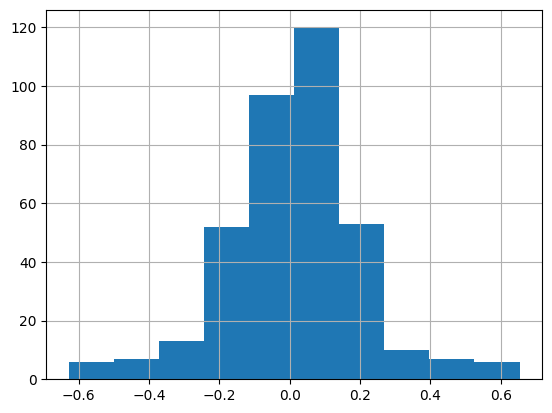

In [45]:
df["Return_15min"].hist()

    - Understanding the correlation of features with target(if any)

<Axes: >

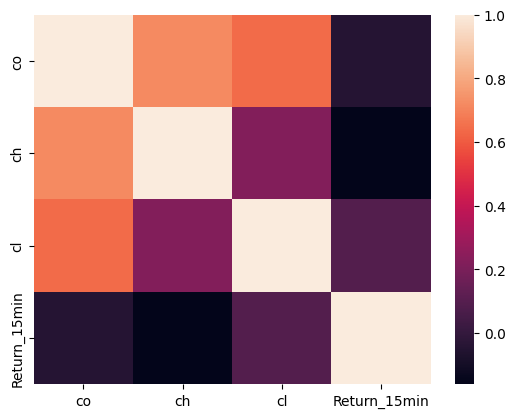

In [46]:
df.corr()
sns.heatmap(df.corr())

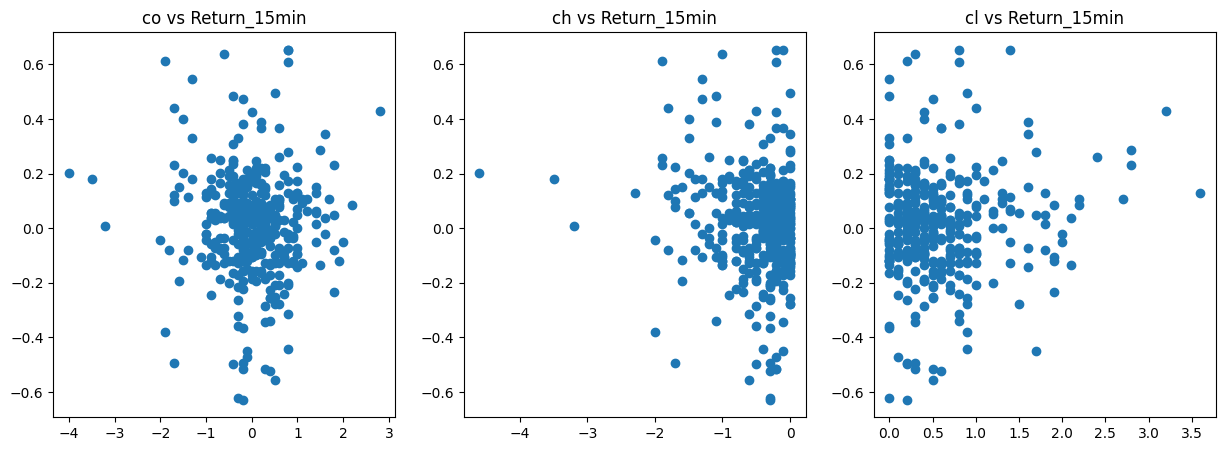

In [47]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(df["co"], df["Return_15min"])
ax[0].set_title("co vs Return_15min")

ax[1].scatter(df["ch"], df["Return_15min"])
ax[1].set_title("ch vs Return_15min")

ax[2].scatter(df["cl"], df["Return_15min"])
ax[2].set_title("cl vs Return_15min")

# plt.tight_layout()
plt.show()


In [48]:
df = df.copy()

In [49]:
df_tree_model = df.copy()

    - Creating the multi-class target values

In [50]:
df.loc[:, "target"] = 0
df.loc[df["Return_15min"] > 0.10, "target"] = 1
df.loc[df["Return_15min"] < -0.05, "target"] = -1
df = df.drop(columns=["Return_15min"])

In [51]:
print(df["target"].value_counts())

target
 0    137
-1    129
 1    105
Name: count, dtype: int64


#### Feature-Target Split

In [62]:
df

,co,ch,cl,target
Time,,,,
09:15:59,1.0,-2.3,3.6,1
09:16:59,1.0,-1.7,1.0,1
09:17:59,0.6,-1.2,2.4,1
09:18:59,0.2,-1.1,1.6,1
09:19:59,1.4,-1.2,1.6,1
...,...,...,...,...
15:21:59,0.7,-0.7,0.7,0
15:22:59,0.9,0.0,1.0,0
15:23:59,0.6,0.0,0.7,-1


In [52]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [60]:
X.head()

,co,ch,cl
Time,,,
09:15:59,1.0,-2.3,3.6
09:16:59,1.0,-1.7,1.0
09:17:59,0.6,-1.2,2.4
09:18:59,0.2,-1.1,1.6
09:19:59,1.4,-1.2,1.6


In [61]:
y

Time
09:15:59    1
09:16:59    1
09:17:59    1
09:18:59    1
09:19:59    1
           ..
15:21:59    0
15:22:59    0
15:23:59   -1
15:24:59   -1
15:25:59    0
Name: target, Length: 371, dtype: int64

In [53]:
print(X.shape)
print(y.shape)

(371, 3)
(371,)



-   Logistic regression is used for classification
-   Linear regression is used for regression


In [54]:
test_size = 0.2
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=test_size)
print(len(X_train), len(y_train), len(X_test), len(y_test))

296 296 75 75


### Training the model

#### Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


-   Regulariziation
-   Epochs

In [56]:
y_pred = lr_model.predict(X_test)

In [65]:
y_pred_prob = lr_model.predict_proba(X_test)
y_pred_prob

array([[0.33859127, 0.41101605, 0.25039268],
       [0.32117836, 0.37663683, 0.30218481],
       [0.38584875, 0.43859513, 0.17555612],
       [0.30573692, 0.36801548, 0.3262476 ],
       [0.39150535, 0.43239191, 0.17610274],
       [0.32294333, 0.38680871, 0.29024797],
       [0.38934862, 0.35491523, 0.25573615],
       [0.39052047, 0.41098103, 0.19849851],
       [0.35880677, 0.38876552, 0.25242771],
       [0.39231343, 0.40625766, 0.2014289 ],
       [0.37206037, 0.40677108, 0.22116855],
       [0.26040763, 0.35936437, 0.38022799],
       [0.37796673, 0.4107223 , 0.21131096],
       [0.33377691, 0.40111755, 0.26510554],
       [0.33621021, 0.36913055, 0.29465924],
       [0.30616742, 0.32599559, 0.36783699],
       [0.2495279 , 0.26298629, 0.48748581],
       [0.39827383, 0.42925793, 0.17246824],
       [0.34013419, 0.36931218, 0.29055363],
       [0.29239762, 0.25385684, 0.45374554],
       [0.31230774, 0.3668577 , 0.32083456],
       [0.37642509, 0.43502347, 0.18855144],
       [0.

In [63]:
y_pred

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,
        0,  0,  1,  0,  0, -1,  0,  1,  0,  1,  0, -1,  0,  0,  0,  0,  0,
        0, -1,  1,  1,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  0,  0,  0,
        0,  0, -1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  1,  0, -1,  0,  0, -1])

    - Metrics

In [57]:
print("Base Accuracy:", accuracy_score(y_test, y_pred))

Base Accuracy: 0.36


[[ 4 21  2]
 [ 4 17  4]
 [ 3 14  6]]


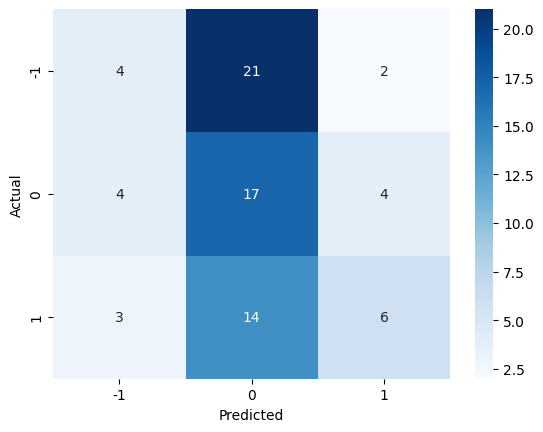

In [58]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=[-1,0,1],
            yticklabels=[-1,0,1],
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.36      0.15      0.21        27
           0       0.33      0.68      0.44        25
           1       0.50      0.26      0.34        23

    accuracy                           0.36        75
   macro avg       0.40      0.36      0.33        75
weighted avg       0.39      0.36      0.33        75



    - Precision - If I have predicted x number of times for a particular class. How many times was I correct
    - Recall - From the overall data, how many of my predictions for that particular class were correct. 

In [66]:
import pickle